### Do Premier League fan accounts get more views when their team loses?

I will use data from 5 fan accounts of respective Premier League teams on YouTube and data from Chelsea FC's YouTube channel:
- Mark Goldbridge - The United Stand (Manchester United)
https://www.youtube.com/channel/UCMmVPVb0BwSIOWVeDwlPocQ
- Craig - Anfield Agenda (Liverpool)
https://www.youtube.com/channel/UC4B_hCk3keopt4-eJc8neiA
- Expressions Oozing - self (Tottenham)
https://www.youtube.com/channel/UC-HSLEEHVlnqlgTB7UptLeg
- DT - AFTV (Arsenal)
https://www.youtube.com/channel/UCBTy8j2cPy6zw68godcE7MQ
- Younes - YounesTalksFootball (Chelsea)
https://www.youtube.com/channel/UC7AiAq4zB5ylQy23gg3H8hA
Chelsea FC - 
https://www.youtube.com/user/chelseafc

In [1018]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set()

In [1019]:
AFTV_path = r"C:\Users\georg\OneDrive\Desktop\Fan Channel views\AFTV_Views - Copy.csv"
Anfield_Agenda_path = r"C:\Users\georg\OneDrive\Desktop\Fan Channel views\Anfield_Agenda_Views.csv"
Expressionz_path = r"C:\Users\georg\OneDrive\Desktop\Fan Channel views\Expressionz_Views.csv"
United_Stand_path = r"C:\Users\georg\OneDrive\Desktop\Fan Channel views\United_stand_views.csv"
Younes_path = r"C:\Users\georg\OneDrive\Desktop\Fan Channel views\YounesFootball_Views.csv"

aftv = pd.read_csv(AFTV_path)
AA = pd.read_csv(Anfield_Agenda_path)
Ex = pd.read_csv(Expressionz_path)
US = pd.read_csv(United_Stand_path)
Younes = pd.read_csv(Younes_path)

In [1020]:
aftv.head()

,Competition,Opponent,Opposition Score,Arsenal Score,Goal Margin,"Result (W, D or L)",DT Reaction video views (K),Watch along views (K)
0,Premier League,Crystal Palace,0,0,0,D,136,269
1,FA Cup,Newcastle,0,2,2,W,198,314
2,Premier League,West Brom,0,4,4,W,307,416
3,Premier League,Brighton,0,1,1,W,247,376
4,Premier League,Chelsea,1,3,2,W,535,783


##### Table Explanation:
The table details all of the games Arsenal have played so far this season. The objective of this analysis is to determine whether or not fan channels recieve more viewers when their team is losing, therefore we have data for the number of views a channels watch along videos get and a video of the immediate reactions after the game. 
For example, In Arsenals match against Chelsea where they won 3-1, the watch along received 783 thousand views and DT's reaction video after the game got 535 thousand views. We're going to see how these numbers change depending on the results of the game. 

## Checking our data
##### AFTV:

In [1021]:
aftv.dtypes

Competition                    object
Opponent                       object
Opposition Score                int64
Arsenal Score                   int64
Goal Margin                     int64
Result (W, D or L)             object
DT Reaction video views (K)     int64
Watch along views (K)           int64
dtype: object

In [1022]:
null_values = aftv[aftv.isnull().any(axis = 1)]
null_values    #No null values

,Competition,Opponent,Opposition Score,Arsenal Score,Goal Margin,"Result (W, D or L)",DT Reaction video views (K),Watch along views (K)


In [1023]:
aftv["DT Reaction video views (K)"].replace(0, np.nan, inplace = True)
aftv.dropna(inplace = True)
aftv["DT Reaction video views (K)"] = aftv["DT Reaction video views (K)"].astype(int)

In [1024]:
aftv["Opponent"].unique # Checking for errors in team names.

<bound method Series.unique of 0        Crystal Palace
1             Newcastle
2             West Brom
3              Brighton
4               Chelsea
5       Manchester City
6               Everton
7           Southampton
8               Burnley
9               Dundalk
10            Tottenham
11         Rapid Vienna
12               Wolves
13                Molde
14                Leeds
15          Aston Villa
16                Molde
17    Manchester United
18              Dundalk
19            Leicester
20         Rapid Vienna
21      Manchester City
22     Sheffield United
23            Liverpool
24            Liverpool
26             West Ham
Name: Opponent, dtype: object>

##### Anfield Agenda:

In [1025]:
AA.dtypes

Competition              object
Opponent                 object
Opposition Score          int64
Liverpool Score           int64
Goal Margin               int64
Result (W, D or L)       object
Craig's Reaction (K)      int64
Watch along views (K)     int64
dtype: object

In [1026]:
null_values = AA[AA.isnull().any(axis = 1)]
null_values # No null values

,Competition,Opponent,Opposition Score,Liverpool Score,Goal Margin,"Result (W, D or L)",Craig's Reaction (K),Watch along views (K)


In [1027]:
AA["Opponent"].unique # No errors

<bound method Series.unique of 0          Aston Villa
1          Southampton
2            Newcastle
3            West Brom
4       Crystal Palace
5            Tottenham
6               Fulham
7          Midtjylland
8               Wolves
9                 Ajax
10            Brighton
11            Atalanta
12           Leicester
13     Manchester City
14            Atalanta
15            West Ham
16         Midtjylland
17    Sheffield United
18                Ajax
19             Everton
20         Aston Villa
21             Arsenal
22             Arsenal
23             Lincoln
24             Chelsea
25               Leeds
Name: Opponent, dtype: object>

##### Expressions Oozing:

In [1028]:
Ex.dtypes

Competition                 object
Opponent                    object
Opposition Score             int64
Tottenham Score              int64
Goal Margin                  int64
Result (W, D or L)          object
Expressionz Reaction (K)     int64
Watch along views (K)        int64
dtype: object

In [1029]:
Ex["Watch along views (K)"].replace(0, np.nan, inplace = True)
Ex.dropna(inplace = True)
Ex["Watch along views (K)"] = Ex["Watch along views (K)"].astype(int)

In [1030]:
null_values = Ex[Ex.isnull().any(axis = 1)]
null_values # No missing values

,Competition,Opponent,Opposition Score,Tottenham Score,Goal Margin,"Result (W, D or L)",Expressionz Reaction (K),Watch along views (K)


In [1031]:
Ex["Opponent"].unique # No errors

<bound method Series.unique of 0                Fulham
2             Brentford
3                 Leeds
4                Wolves
5                 Stoke
6             Leicester
7             Liverpool
8        Crystal Palace
9               Antwerp
10              Arsenal
11                 LASK
12              Chelsea
13           Ludogorets
14      Manchester City
15            West Brom
16           Ludogorets
17             Brighton
18              Antwerp
19              Burnley
20                 LASK
21             West Ham
22    Manchester United
24              Chelsea
25            Newcastle
27          Southampton
29              Everton
Name: Opponent, dtype: object>

##### The United Stand

In [1032]:
US.dtypes

Competition                object
Opponent                   object
Opposition Score            int64
United Score                int64
Goal Margin                 int64
Result (W, D or L)         object
Goldbridge Reaction (K)     int64
Watch along views (K)       int64
dtype: object

In [1033]:
null_values = US[US.isnull().any(axis = 1)]
null_values #No missing values

,Competition,Opponent,Opposition Score,United Score,Goal Margin,"Result (W, D or L)",Goldbridge Reaction (K),Watch along views (K)


In [1034]:
US["Opponent"].unique #No errors

<bound method Series.unique of 0              Burnley
1              Watford
2      Manchester City
3          Aston Villa
4               Wolves
5            Leicester
6              Everton
7                Leeds
8     Sheffield United
9      Manchester City
10             Leipzig
11            West Ham
12                 PSG
13         Southampton
14          Basaksehir
15           West Brom
16             Everton
17          Basaksehir
18             Arsenal
19             Leipzig
20             Chelsea
21                 PSG
22           Newcastle
23           Tottenham
24            Brighton
25            Brighton
26               Luton
27      Crystal Palace
Name: Opponent, dtype: object>

##### YounesTalksFootball:

In [1035]:
Younes.dtypes

Competition                        object
Opponent                           object
Opposition Score                    int64
Chelsea Score                       int64
Goal Margin                         int64
Result (W, D or L)                 object
Younes Reaction (K)                 int64
Watch along views (K)              object
Chelsea FC highlight views (K)    float64
dtype: object

In [1036]:
Younes.head()

,Competition,Opponent,Opposition Score,Chelsea Score,Goal Margin,"Result (W, D or L)",Younes Reaction (K),Watch along views (K),Chelsea FC highlight views (K)
0,FA Cup,Morecombe,0,4,4,W,37,38,658.0
1,Premier League,Manchester City,3,1,-2,L,49,50,2200.0
2,Premier League,Aston Villa,1,1,0,D,37,58,950.0
3,Premier League,Arsenal,3,1,-2,L,53,48,2900.0
4,Premier League,West Ham,0,3,3,W,30,35,1800.0


In [1037]:
null_values = Younes[Younes.isnull().any(axis = 1)]
null_values 
# We can see Chelsea havent uploaded Champions League highlights and Younes didnt do watch alongs to them.

,Competition,Opponent,Opposition Score,Chelsea Score,Goal Margin,"Result (W, D or L)",Younes Reaction (K),Watch along views (K),Chelsea FC highlight views (K)
7,Champions League,Krasnodar,1,1,0,D,26,29,NaN
9,Champions League,Sevilla,0,4,4,W,38,-,NaN
11,Champions League,Rennes,1,2,1,W,34,-,NaN
14,Champions League,Rennes,0,3,3,W,35,-,NaN
16,Champions League,Krasnodar,0,4,4,W,45,-,NaN
18,Champions League,Sevilla,0,0,0,D,34,-,NaN


In [1038]:
Younes["Watch along views (K)"].unique # Watch along column is useless, we can drop this column

<bound method Series.unique of 0     38
1     50
2     58
3     48
4     35
5      -
6     37
7     29
8      -
9      -
10     -
11     -
12     -
13     -
14     -
15     -
16     -
17     -
18     -
19     -
20     -
21     -
22     -
23     -
24     -
25     -
Name: Watch along views (K), dtype: object>

In [1039]:
Younes["Chelsea FC highlight views (K)"].unique #We can just drop the Champions League matches

<bound method Series.unique of 0      658.0
1     2200.0
2      950.0
3     2900.0
4     1800.0
5     1300.0
6     1100.0
7        NaN
8     3100.0
9        NaN
10    1000.0
11       NaN
12    1600.0
13    3500.0
14       NaN
15    2600.0
16       NaN
17    2000.0
18       NaN
19    2700.0
20    1900.0
21    2300.0
22    2700.0
23    4100.0
24    2700.0
25    3000.0
Name: Chelsea FC highlight views (K), dtype: float64>

In [1040]:
Younes.drop(columns = ["Watch along views (K)"], inplace = True)

In [1041]:
Younes.dropna(inplace = True)

In [1042]:
null_values = Younes[Younes.isnull().any(axis = 1)]
null_values # No null values left

,Competition,Opponent,Opposition Score,Chelsea Score,Goal Margin,"Result (W, D or L)",Younes Reaction (K),Chelsea FC highlight views (K)


In [1043]:
Younes["Opponent"].unique # No errors

<bound method Series.unique of 0             Morecombe
1       Manchester City
2           Aston Villa
3               Arsenal
4              West Ham
5                Wolves
6               Everton
8                 Leeds
10            Tottenham
12            Newcastle
13     Sheffield United
15              Burnley
17    Manchester United
19          Southampton
20       Crystal Palace
21            Tottenham
22            West Brom
23             Barnsley
24            Liverpool
25             Brighton
Name: Opponent, dtype: object>

To conclude, for YounesTalksFootball we cant compare the watch alongs, however we have extra data on Chelsea FC's highlight views on YouTube. We can see if the views change when Chelsea either win or lose.

### AFTV Stats

In [1044]:
AFTV_Ls = aftv[aftv["Result (W, D or L)"] == "L"]
AFTV_Ls # Table of only Arsenal losses

,Competition,Opponent,Opposition Score,Arsenal Score,Goal Margin,"Result (W, D or L)",DT Reaction video views (K),Watch along views (K)
5,EFL Cup,Manchester City,4,1,-3,L,629,916
6,Premier League,Everton,2,1,-1,L,699,812
8,Premier League,Burnley,1,0,-1,L,945,856
10,Premier League,Tottenham,2,0,-2,L,775,909
12,Premier League,Wolves,2,1,-1,L,518,559
15,Premier League,Aston Villa,3,0,-3,L,685,615
19,Premier League,Leicester,1,0,-1,L,361,365
21,Premier League,Manchester City,1,0,-1,L,248,291
24,Premier League,Liverpool,3,1,-2,L,307,448


In [1045]:
AFTV_Ws = aftv[aftv["Result (W, D or L)"] == "W"]
AFTV_Ws # Table of only Arsenal wins

,Competition,Opponent,Opposition Score,Arsenal Score,Goal Margin,"Result (W, D or L)",DT Reaction video views (K),Watch along views (K)
1,FA Cup,Newcastle,0,2,2,W,198,314
2,Premier League,West Brom,0,4,4,W,307,416
3,Premier League,Brighton,0,1,1,W,247,376
4,Premier League,Chelsea,1,3,2,W,535,783
9,Europa League,Dundalk,2,4,2,W,201,206
11,Europa League,Rapid Vienna,1,4,3,W,206,201
13,Europa League,Molde,0,3,3,W,151,156
16,Europa League,Molde,1,4,3,W,116,190
17,Premier League,Manchester United,0,1,1,W,367,570
18,Europa League,Dundalk,0,3,3,W,159,236


###### For DT videos:

In [1046]:
dt_avg_views_Ls = AFTV_Ls["DT Reaction video views (K)"].mean() 
dt_avg_views_Ls
# Average number of views DT reaction videos receive when Arsenal lose.

574.1111111111111

In [1047]:
dt_avg_views_Ws = AFTV_Ws["DT Reaction video views (K)"].mean() 
dt_avg_views_Ws
# Average number of views DT reaction videos receive when Arsenal win.

237.35714285714286

In [1048]:
res = dt_avg_views_Ls - dt_avg_views_Ws
dt_res = res / dt_avg_views_Ws * 100  
dt_res
# Percentage increased number of views DT receives when Arsenal lose.

141.8764837663423

In [1049]:
deci_dt = dt_avg_views_Ls / dt_avg_views_Ws 
deci_dt
# Number of times more views DT receives when Arsenal lose compared to when they win.

2.418764837663423

In [1050]:
df = aftv[["Opponent", "Goal Margin", "Result (W, D or L)", "DT Reaction video views (K)"]]
df

,Opponent,Goal Margin,"Result (W, D or L)",DT Reaction video views (K)
0,Crystal Palace,0,D,136
1,Newcastle,2,W,198
2,West Brom,4,W,307
3,Brighton,1,W,247
4,Chelsea,2,W,535
5,Manchester City,-3,L,629
6,Everton,-1,L,699
7,Southampton,0,D,400
8,Burnley,-1,L,945
9,Dundalk,2,W,201


In [1051]:
df.sort_values("Goal Margin", ascending = True)
# We can see how the views are lower when Arsenal win.

,Opponent,Goal Margin,"Result (W, D or L)",DT Reaction video views (K)
15,Aston Villa,-3,L,685
5,Manchester City,-3,L,629
24,Liverpool,-2,L,307
10,Tottenham,-2,L,775
12,Wolves,-1,L,518
21,Manchester City,-1,L,248
19,Leicester,-1,L,361
6,Everton,-1,L,699
8,Burnley,-1,L,945
14,Leeds,0,D,296


Text(0, 0.5, 'Number of views (K)')

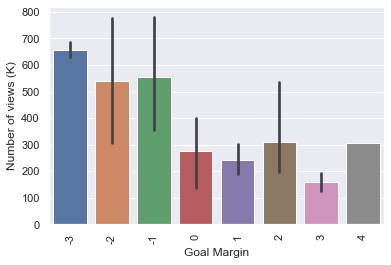

In [1052]:
sns.barplot(x = df["Goal Margin"], y = df["DT Reaction video views (K)"])
plt.xticks(rotation = 90)
plt.xlabel("Goal Margin")
plt.ylabel("Number of views (K)")
# Error bars suggest the highest and lowest views from a set of videos featuring a particular goal margin.

###### For watch along videos:

In [1053]:
aftv_avg_views_wa_Ls = AFTV_Ls["Watch along views (K)"].mean()
aftv_avg_views_wa_Ls # Average views on AFTV's watch along videos when Arsenal lose. 

641.2222222222222

In [1054]:
aftv_avg_views_wa_Ws = AFTV_Ws["Watch along views (K)"].mean()
aftv_avg_views_wa_Ws # Average views on AFTV's watch along videos when Arsenal win.

320.35714285714283

In [1055]:
res = avg_views_wa_Ls - avg_views_wa_Ws
aftv_res = res / avg_views_wa_Ws * 100 
aftv_res
# Percentage increase on AFTV's average views on watch alongs. 100% more views when Arsenal lose. 

21.699471915506496

In [1056]:
deci_aftv = aftv_avg_views_wa_Ls / aftv_avg_views_wa_Ws 
deci_aftv
# 2 times the amount of people tune in when Arsenal are losing. 

2.0015855320203144

In [1057]:
df = aftv[["Opponent", "Goal Margin", "Result (W, D or L)", "Watch along views (K)"]]

In [1058]:
df.sort_values("Goal Margin", ascending = True) # Looks similiar to the previous table

,Opponent,Goal Margin,"Result (W, D or L)",Watch along views (K)
15,Aston Villa,-3,L,615
5,Manchester City,-3,L,916
24,Liverpool,-2,L,448
10,Tottenham,-2,L,909
12,Wolves,-1,L,559
21,Manchester City,-1,L,291
19,Leicester,-1,L,365
6,Everton,-1,L,812
8,Burnley,-1,L,856
14,Leeds,0,D,367


Text(0, 0.5, 'Number of views (K)')

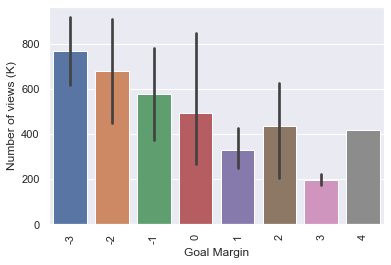

In [1059]:
sns.barplot(x = df["Goal Margin"], y = df["Watch along views (K)"])
plt.xticks(rotation = 90)
plt.xlabel("Goal Margin")
plt.ylabel("Number of views (K)") 
# Views do vary a lot depending on the specific game, however we can see the worse Arsenal perform ...
# ... the more views AFTV attract.

### Anfield Agenda Stats:

In [1060]:
AA_Ws = AA[AA["Result (W, D or L)"] == "W"]
AA_Ws

,Competition,Opponent,Opposition Score,Liverpool Score,Goal Margin,"Result (W, D or L)",Craig's Reaction (K),Watch along views (K)
0,FA Cup,Aston Villa,1,4,3,W,10,37
4,Premier League,Crystal Palace,0,7,7,W,10,61
5,Premier League,Tottenham,1,2,1,W,12,48
8,Premier League,Wolves,0,4,4,W,10,58
9,Champions League,Ajax,0,1,1,W,9,43
12,Premier League,Leicester,0,3,3,W,10,68
14,Champions League,Atalanta,0,5,5,W,19,71
15,Premier League,West Ham,1,2,1,W,11,69
16,Champions League,Midtjylland,0,2,2,W,7,52
17,Premier League,Sheffield United,1,2,1,W,7,106


In [1061]:
AA_Ls = AA[AA["Result (W, D or L)"] != "W"]
AA_Ls

,Competition,Opponent,Opposition Score,Liverpool Score,Goal Margin,"Result (W, D or L)",Craig's Reaction (K),Watch along views (K)
1,Premier League,Southampton,1,0,-1,L,24,66
2,Premier League,Newcastle,0,0,0,D,14,45
3,Premier League,West Brom,1,1,0,D,10,48
6,Premier League,Fulham,1,1,0,D,6,57
7,Champions League,Midtjylland,1,1,0,D,5,47
10,Premier League,Brighton,1,1,0,D,10,44
11,Champions League,Atalanta,2,0,-2,L,6,54
13,Premier League,Manchester City,1,1,0,D,9,78
19,Premier League,Everton,2,2,0,D,24,88
20,Premier League,Aston Villa,7,2,-5,L,261,264


###### For Craig's reaction videos:

In [1062]:
craig_avg_views_Ws = AA_Ws["Craig's Reaction (K)"].mean() 
craig_avg_views_Ws # Average videos on Craig's reaction videos after Liverpool win.

10.866666666666667

In [1063]:
craig_avg_views_Ls = AA_Ls["Craig's Reaction (K)"].mean() 
craig_avg_views_Ls # Average views on Craig's reaction videos after Liverpool draw or win.

34.09090909090909

In [1064]:
res = craig_avg_views_Ls - craig_avg_views_Ws
craig_res = res / craig_avg_views_Ws * 100 
craig_res
# Percentage of more views Craig gets when Liverpool win or draw.

213.72002230897937

In [1065]:
deci_craig = craig_avg_views_Ls / craig_avg_views_Ws 
deci_craig
# Number of more views Craigs reactions receive when Liverpool don't win.

3.1372002230897937

In [1066]:
df = AA[["Opponent", "Goal Margin", "Result (W, D or L)", "Craig's Reaction (K)"]]

In [1067]:
df.sort_values("Goal Margin", ascending = True) 
# We can see the heavy liverpool defeat spiked huge flow of views onto his channel. 

,Opponent,Goal Margin,"Result (W, D or L)",Craig's Reaction (K)
20,Aston Villa,-5,L,261
11,Atalanta,-2,L,6
1,Southampton,-1,L,24
21,Arsenal,-1,L,6
19,Everton,0,D,24
2,Newcastle,0,D,14
3,West Brom,0,D,10
6,Fulham,0,D,6
7,Midtjylland,0,D,5
10,Brighton,0,D,10


In [1068]:
df = df[df["Goal Margin"] != -5]
res = df["Craig's Reaction (K)"].mean()
res

11.08

In [1069]:
df2 = df[df["Result (W, D or L)"] != "W"]
df2

,Opponent,Goal Margin,"Result (W, D or L)",Craig's Reaction (K)
1,Southampton,-1,L,24
2,Newcastle,0,D,14
3,West Brom,0,D,10
6,Fulham,0,D,6
7,Midtjylland,0,D,5
10,Brighton,0,D,10
11,Atalanta,-2,L,6
13,Manchester City,0,D,9
19,Everton,0,D,24
21,Arsenal,-1,L,6


In [1070]:
df2["Craig's Reaction (K)"].mean() 
# Average amount of viewers when Liverpool draw or lose without Aston Villa.

11.4

In [1071]:
261 / res # Number of times more views craig received when Liverpool suffered a heavy defeat.

23.555956678700362

###### For Anfield Agenda watch along's:

In [1072]:
AA_avg_views_wa_Ws = AA_Ws["Watch along views (K)"].mean() 
AA_avg_views_wa_Ws # Average views on watch alongs when Liverpool win.

64.4

In [1073]:
AA_avg_views_wa_Ls = AA_Ls["Watch along views (K)"].mean() 
AA_avg_views_wa_Ls # Average views on watch alongs when Liverpool draw or lose.

77.9090909090909

In [1074]:
res = AA_avg_views_wa_Ls - AA_avg_views_wa_Ws
AA_res = res / AA_avg_views_wa_Ws * 100 
AA_res
# How many more views do the watch alongs receive when losing or drawing? (%)

20.97684923771879

In [1075]:
deci_AA = AA_avg_views_wa_Ls / AA_avg_views_wa_Ws 
deci_AA
# Watch alongs receive 1.2 times more views when Liverpool aren't winning.

1.2097684923771879

In [1076]:
df = AA[["Opponent", "Goal Margin", "Result (W, D or L)", "Watch along views (K)"]]

In [1077]:
df.sort_values("Goal Margin", ascending = True) # Similar looking table to the previous one

,Opponent,Goal Margin,"Result (W, D or L)",Watch along views (K)
20,Aston Villa,-5,L,264
11,Atalanta,-2,L,54
1,Southampton,-1,L,66
21,Arsenal,-1,L,66
19,Everton,0,D,88
2,Newcastle,0,D,45
3,West Brom,0,D,48
6,Fulham,0,D,57
7,Midtjylland,0,D,47
10,Brighton,0,D,44


In [1078]:
df = df[df["Goal Margin"] != -5]
res = df["Watch along views (K)"].mean()
res # Average number of views on watch alongs without the heavy defeat.

62.36

In [1079]:
264 / res # Number of times more the amount of people viewing the heavy defeat compared to other games.

4.23348300192431

## Expressionz Oozing Stats:

In [1080]:
Ex_Ws = Ex[Ex["Result (W, D or L)"] == "W"]
Ex_Ws

,Competition,Opponent,Opposition Score,Tottenham Score,Goal Margin,"Result (W, D or L)",Expressionz Reaction (K),Watch along views (K)
2,EFL Cup,Brentford,0,2,2,W,47,74
3,Premier League,Leeds,0,3,3,W,47,60
5,EFL Cup,Stoke,1,3,2,W,61,59
9,Europa League,Antwerp,0,2,2,W,46,28
10,Premier League,Arsenal,0,2,2,W,152,118
13,Europa League,Ludogorets,0,4,4,W,24,27
14,Premier League,Manchester City,0,2,2,W,79,107
15,Premier League,West Brom,0,1,1,W,26,80
16,Europa League,Ludogorets,1,3,2,W,28,30
17,Premier League,Brighton,1,2,1,W,49,64


In [1081]:
Ex_LDs = Ex[Ex["Result (W, D or L)"] != "W"]
Ex_LDs

,Competition,Opponent,Opposition Score,Tottenham Score,Goal Margin,"Result (W, D or L)",Expressionz Reaction (K),Watch along views (K)
0,Premier League,Fulham,1,1,0,D,85,57
4,Premier League,Wolves,1,1,0,D,91,87
6,Premier League,Leicester,2,0,-2,L,105,116
7,Premier League,Liverpool,2,1,-1,L,85,113
8,Premier League,Crystal Palace,1,1,0,D,47,49
11,Europa League,LASK,3,3,0,D,43,50
12,Premier League,Chelsea,0,0,0,D,38,65
18,Europa League,Antwerp,1,0,-1,L,77,59
21,Premier League,West Ham,3,3,0,D,165,130
25,Premier League,Newcastle,1,1,0,D,131,68


In [1082]:
Ex_Ls = Ex[Ex["Result (W, D or L)"] == "L"]
Ex_Ls

,Competition,Opponent,Opposition Score,Tottenham Score,Goal Margin,"Result (W, D or L)",Expressionz Reaction (K),Watch along views (K)
6,Premier League,Leicester,2,0,-2,L,105,116
7,Premier League,Liverpool,2,1,-1,L,85,113
18,Europa League,Antwerp,1,0,-1,L,77,59
29,Premier League,Everton,1,0,-1,L,200,86


###### For Expressions reaction videos:

In [1083]:
Ex_avg_views_Ws = Ex_Ws["Expressionz Reaction (K)"].mean()
Ex_avg_views_Ws # Average number of views when Tottenham win.

59.333333333333336

In [1084]:
Ex_avg_views_LDs = Ex_LDs["Expressionz Reaction (K)"].mean()
Ex_avg_views_LDs # Average number of views when Tottenham draw or lose.

97.0

In [1085]:
Ex_avg_views_Ls = Ex_Ls["Expressionz Reaction (K)"].mean()
Ex_avg_views_Ls # Average number of views when Tottenham lose.

116.75

In [1086]:
res = Ex_avg_views_LDs - Ex_avg_views_Ws
Ex_res1 = res / Ex_avg_views_Ws * 100
Ex_res1
# Increase in average views when Tottenham draw or lose.

63.48314606741572

In [1087]:
res = Ex_avg_views_Ls - Ex_avg_views_Ws
Ex_res2 = res / Ex_avg_views_Ws * 100
Ex_res2
# Increase in average views when Tottenham lose.

96.76966292134831

In [1088]:
Ex_res3 = Ex_avg_views_LDs / Ex_avg_views_Ws
Ex_res3
# Number of times more views received when Tottenham draw or lose.

1.6348314606741572

In [1089]:
Ex_res4 = Ex_avg_views_Ls / Ex_avg_views_Ws
Ex_res4
# Number of times more views received when Tottenham lose.

1.967696629213483

###### For watch along videos:

In [1090]:
Ex_avg_views_wa_Ws = Ex_Ws["Watch along views (K)"].mean()
Ex_avg_views_wa_Ws # Average number of views on watch alongs when Tottenham win.

67.73333333333333

In [1091]:
Ex_avg_views_wa_LDs = Ex_LDs["Watch along views (K)"].mean()
Ex_avg_views_wa_LDs # Average number of views on watch alongs when Tottenham draw or lose.

80.0

In [1092]:
Ex_avg_views_wa_Ls = Ex_Ls["Watch along views (K)"].mean()
Ex_avg_views_wa_Ls # Average number of views on watch alongs when Tottenham lose.

93.5

In [1093]:
res = Ex_avg_views_wa_LDs - Ex_avg_views_wa_Ws
Ex_res5 = res / Ex_avg_views_wa_Ws * 100 
Ex_res5
# Percentage of increased watch along views when Tottenham are losing or drawing.

18.11023622047244

In [1094]:
res = Ex_avg_views_wa_Ls - Ex_avg_views_wa_Ws
Ex_res6 = res / Ex_avg_views_wa_Ls * 100
Ex_res6 # Percentage of increased watch along views when Tottenham are losing.

27.557932263814617

In [1095]:
Ex_res7 = Ex_avg_views_wa_LDs / Ex_avg_views_wa_Ws
Ex_res7
# Number of times more views on watch alongs received when Tottenham draw or lose.

1.1811023622047243

In [1096]:
Ex_res8 = Ex_avg_views_wa_Ls / Ex_avg_views_wa_Ws
Ex_res8
# Number of times more views on watch alongs received when Tottenham lose.

1.3804133858267715

In [1097]:
d = {"Watch Along Statistics": [Ex_avg_views_wa_Ws, Ex_avg_views_wa_LDs, Ex_avg_views_wa_Ls, 
                               Ex_res1, Ex_res2, Ex_res3, Ex_res4],
     "Expressionz Reacts Statistics": [Ex_avg_views_Ws, Ex_avg_views_LDs, Ex_avg_views_Ls, 
                               Ex_res5, Ex_res6, Ex_res7, Ex_res8]}
df = pd.DataFrame(data = d, index = ["Average Views (W)", "Average Views (L+D)", "Average Views (L)", 
                                     "% of more views on Ls & Ds", "% of more views on Ls", 
                                     "x more views on Ls and Ds", "x more views on Ls"])
df.round(2)

,Watch Along Statistics,Expressionz Reacts Statistics
Average Views (W),67.73,59.33
Average Views (L+D),80.00,97.00
Average Views (L),93.50,116.75
% of more views on Ls & Ds,63.48,18.11
% of more views on Ls,96.77,27.56
x more views on Ls and Ds,1.63,1.18
x more views on Ls,1.97,1.38


## The United Stand Stats:

In [1098]:
US_Ws = US[US["Result (W, D or L)"] != "L"]
US_Ws # Manchester United wins.

,Competition,Opponent,Opposition Score,United Score,Goal Margin,"Result (W, D or L)",Goldbridge Reaction (K),Watch along views (K)
0,Premier League,Burnley,0,1,1,W,370,659
1,FA Cup,Watford,0,1,1,W,209,433
3,Premier League,Aston Villa,1,2,1,W,373,614
4,Premier League,Wolves,0,1,1,W,333,591
5,Premier League,Leicester,2,2,0,D,263,605
6,EFL Cup,Everton,0,2,2,W,305,470
7,Premier League,Leeds,2,6,4,W,372,657
8,Premier League,Sheffield United,2,3,1,W,265,562
9,Premier League,Manchester City,0,0,0,D,231,569
11,Premier League,West Ham,1,3,2,W,303,566


In [1099]:
US_Ls = US[US["Result (W, D or L)"] == "L"]
US_Ls # Manchester United losses.

,Competition,Opponent,Opposition Score,United Score,Goal Margin,"Result (W, D or L)",Goldbridge Reaction (K),Watch along views (K)
2,EFL Cup,Manchester City,2,0,-2,L,290,731
10,Champions League,Leipzig,3,2,-1,L,454,950
12,Champions League,PSG,3,1,-2,L,274,567
17,Champions League,Basaksehir,2,1,-1,L,376,606
18,Premier League,Arsenal,1,0,-1,L,418,503
23,Premier League,Tottenham,6,1,-5,L,438,1000
27,Premier League,Crystal Palace,3,1,-2,L,414,713


###### For Goldbridge reaction videos:

In [1100]:
US_avg_views_Ws = US_Ws["Goldbridge Reaction (K)"].mean()
US_avg_views_Ws # Average views Goldbridge reaction videos receive when Manchester United win. 

299.76190476190476

In [1101]:
US_avg_views_Ls = US_Ls["Goldbridge Reaction (K)"].mean()
US_avg_views_Ls 
# Average views Goldbridge reaction videos receive when Manchester United lose. 

380.57142857142856

In [1102]:
d = {"Average views between wins and losses": [US_avg_views_Ws, US_avg_views_Ls]}
df = pd.DataFrame(data = d, index = ["Avg views (wins)", "Avg views (losses)"])

([<matplotlib.patches.Wedge at 0x1c3a8606bc8>,
 [Text(-1.0809091976409615, 0.20404731425621123, 'Avg views (wins)'),
  Text(1.0809091785366685, -0.2040474154582328, 'Avg views (losses)')],
 [Text(-0.589586835076888, 0.11129853504884248, '44.1%'),
  Text(0.5895868246563646, -0.11129859024994515, '55.9%')])

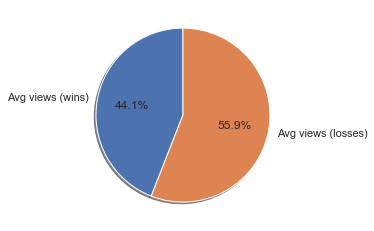

In [1103]:
plt.pie(df["Average views between wins and losses"], labels = df.index, startangle = 90, 
        shadow = True, autopct='%1.1f%%')

In [1104]:
res = US_avg_views_Ls - US_avg_views_Ws
Gold_res = res / US_avg_views_Ws * 100 
Gold_res
# Increase % more views when Manchester United lose.

26.95790309769658

In [1105]:
deci_US = US_avg_views_Ls / US_avg_views_Ws 
deci_US
# Number of times more views received when Manchester United lose.

1.269579030976966

###### For watch along videos:

In [1106]:
US_avg_views_wa_Ws = US_Ws["Watch along views (K)"].mean()
US_avg_views_wa_Ws # Number of views on watch alongs when Manchester United win.

595.1428571428571

In [1107]:
US_avg_views_wa_Ls = US_Ls["Watch along views (K)"].mean()
US_avg_views_wa_Ls # Number of views on watch alongs when Manchester United lose.

724.2857142857143

In [1108]:
res = US_avg_views_wa_Ls - US_avg_views_wa_Ws
Gold_res = res / US_avg_views_wa_Ws * 100
Gold_res
# % increase in views when Manchester United were losing.

21.699471915506496

In [1109]:
deci_Gold = US_avg_views_wa_Ls / US_avg_views_wa_Ws 
deci_Gold
# Number of times more views watch alongs received when Manchester United were losing.

1.216994719155065

In [1110]:
657 / 1000 * 100 
# United Stand watch along received 65% more views on their heaviest defeat compared to heaviest win. 

65.7

## YounesTalksFootball Stats:

In [1111]:
Younes_Ws = Younes[Younes["Result (W, D or L)"] == "W"]
Younes_Ws # Chelsea Wins

,Competition,Opponent,Opposition Score,Chelsea Score,Goal Margin,"Result (W, D or L)",Younes Reaction (K),Chelsea FC highlight views (K)
0,FA Cup,Morecombe,0,4,4,W,37,658.0
4,Premier League,West Ham,0,3,3,W,30,1800.0
8,Premier League,Leeds,1,3,2,W,27,3100.0
12,Premier League,Newcastle,0,2,2,W,35,1600.0
13,Premier League,Sheffield United,1,4,3,W,63,3500.0
15,Premier League,Burnley,0,3,3,W,58,2600.0
20,Premier League,Crystal Palace,0,4,4,W,48,1900.0
23,EFL Cup,Barnsley,0,6,6,W,43,4100.0
25,Premier League,Brighton,1,3,2,W,40,3000.0


In [1112]:
Younes_LDs = Younes[Younes["Result (W, D or L)"] != "W"]
Younes_LDs #Chelsea draws and losses

,Competition,Opponent,Opposition Score,Chelsea Score,Goal Margin,"Result (W, D or L)",Younes Reaction (K),Chelsea FC highlight views (K)
1,Premier League,Manchester City,3,1,-2,L,49,2200.0
2,Premier League,Aston Villa,1,1,0,D,37,950.0
3,Premier League,Arsenal,3,1,-2,L,53,2900.0
5,Premier League,Wolves,2,1,-1,L,36,1300.0
6,Premier League,Everton,1,0,-1,L,29,1100.0
10,Premier League,Tottenham,0,0,0,D,33,1000.0
17,Premier League,Manchester United,0,0,0,D,39,2000.0
19,Premier League,Southampton,3,3,0,D,56,2700.0
21,EFL Cup,Tottenham,2,1,-1,L,47,2300.0
22,Premier League,West Brom,3,3,0,D,44,2700.0


In [1113]:
Younes_Ls = Younes[Younes["Result (W, D or L)"] == "L"]
Younes_Ls

,Competition,Opponent,Opposition Score,Chelsea Score,Goal Margin,"Result (W, D or L)",Younes Reaction (K),Chelsea FC highlight views (K)
1,Premier League,Manchester City,3,1,-2,L,49,2200.0
3,Premier League,Arsenal,3,1,-2,L,53,2900.0
5,Premier League,Wolves,2,1,-1,L,36,1300.0
6,Premier League,Everton,1,0,-1,L,29,1100.0
21,EFL Cup,Tottenham,2,1,-1,L,47,2300.0
24,Premier League,Liverpool,2,0,-2,L,55,2700.0


###### Younes reaction videos:

In [1114]:
Younes_avg_views_Ws = Younes_Ws["Younes Reaction (K)"].mean()
Younes_avg_views_Ws #Average wins when Chelsea win.

42.333333333333336

In [1115]:
Younes_avg_views_LDs = Younes_LDs["Younes Reaction (K)"].mean()
Younes_avg_views_LDs #Average views when Chelsea draw or lose.

43.45454545454545

In [1116]:
Younes_avg_views_Ls = Younes_Ls["Younes Reaction (K)"].mean()
Younes_avg_views_Ls # Average views when Chelsea lose.

44.833333333333336

In [1117]:
res = Younes_avg_views_LDs - Younes_avg_views_Ws
Younes_res1 = res / Younes_avg_views_Ws * 100 
Younes_res1
# % increase of average views when Chelsea draw or lose.

2.6485325697924034

In [1118]:
res = Younes_avg_views_Ls - Younes_avg_views_Ws
Younes_res2 = res / Younes_avg_views_Ws * 100  
Younes_res2
# % increase of average views when Chelsea lose.

5.905511811023622

In [1119]:
deci_Younes1 = Younes_avg_views_LDs / Younes_avg_views_Ws 
deci_Younes1
# Number of times more average views recevied when Chelsea draw or lose.

1.026485325697924

In [1120]:
deci_Younes = Younes_avg_views_Ls / Younes_avg_views_Ws 
deci_Younes
# Number of times more average views recevied when Chelsea lose.

1.0590551181102361

###### Chelsea FC's official channel. Do Chelsea receive more views on their channel when they lose matches?

In [1121]:
avg_views_CFC_Ws = Younes_Ws["Chelsea FC highlight views (K)"].mean()
avg_views_CFC_Ws # Averge views Chelsea receive when they win.

2473.1111111111113

In [1122]:
avg_views_CFC_Ls = Younes_Ls["Chelsea FC highlight views (K)"].mean()
avg_views_CFC_Ls # Average views Chelsea receive when they lose.

2083.3333333333335

In [1123]:
res = avg_views_CFC_Ls - avg_views_CFC_Ws
res / avg_views_CFC_Ws * 100 # % increase in views when Chelsea lose. 

-15.760625393117081

In [1124]:
avg_views_CFC_Ls / avg_views_CFC_Ws # Number of times the amount of views received when losing. 

0.8423937460688292

In [1125]:
df = pd.DataFrame({"Views when Chelsea win": avg_views_CFC_Ws, 
                   "Views when Chelsea lose": avg_views_CFC_Ls}, index = ["Results"])
df

,Views when Chelsea win,Views when Chelsea lose
Results,2473.111111,2083.333333


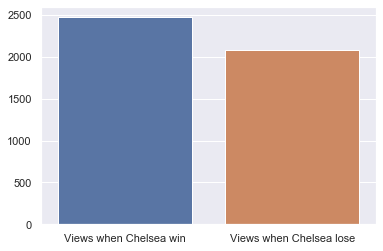

In [1126]:
sns.barplot(data = df)

## Summary table

In [1127]:
df = pd.DataFrame({"Average reaction video views when winning":[dt_avg_views_Ws, craig_avg_views_Ws, 
                                                              Ex_avg_views_Ws, US_avg_views_Ws, 
                                                              Younes_avg_views_Ws], 
                  "Average reaction video views when losing": [dt_avg_views_Ls, craig_avg_views_Ls, 
                                                              Ex_avg_views_Ls, US_avg_views_Ls, 
                                                              Younes_avg_views_Ls], 
                  "% more views received when losing compared to winning": [dt_res, 
                                                                            craig_res, 
                                                              Ex_res2, Gold_res, 
                                                              Younes_res2], 
                  "x more views when losing compared to winning":[deci_dt, deci_craig, 
                                                              Ex_res4, deci_Gold, 
                                                              deci_Younes]}, 
                 index = ["DT (AFTV)", "Craig (Anfield Agenda)", "Ex (Expressionz Oozing)",
                          "Goldbridge (United Stand)", "Younes (YounesTalksFootball)"])
df.round(2)

,Average reaction video views when winning,Average reaction video views when losing,% more views received when losing compared to winning,x more views when losing compared to winning
DT (AFTV),237.36,574.11,141.88,2.42
Craig (Anfield Agenda),10.87,34.09,213.72,3.14
Ex (Expressionz Oozing),59.33,116.75,96.77,1.97
Goldbridge (United Stand),299.76,380.57,21.70,1.22
Younes (YounesTalksFootball),42.33,44.83,5.91,1.06
